In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import random
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.python.keras.utils import data_utils
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, cohen_kappa_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Performance Evaluation for VGG

In [2]:
test_datagen = ImageDataGenerator(rescale = 1./255) 


#Loading test images
test_generator_model = test_datagen.flow_from_directory(
        'test/',  
        target_size=(224, 224),  
        batch_size= 32,
         shuffle= False,
        class_mode='categorical') 

Found 780 images belonging to 3 classes.


In [3]:
#load model
model = keras.models.load_model('Covid19_model.h5')
scores_model = model.evaluate(test_generator_model)

25/25 [==============================] - 182s 7s/step - loss: 0.3756 - accuracy: 0.8513


In [4]:
#testing images and label
probabilities_model = model.predict(test_generator_model)
y_pred_model = np.argmax(probabilities_model, axis=1)

#performance metrics
accuracy_vgg = scores_model[1]
print("Accuracy = ", accuracy_vgg)
print("-------------------------")
loss_vgg = scores_model[0]
print("Loss = ", loss_vgg)
print("-------------------------")
print("Confusion Matrix")
vgg_confusion_matrix = confusion_matrix(test_generator_model.classes, y_pred_model)
print(vgg_confusion_matrix)
print("-------------------------")
print("Classification Report")
report = classification_report(test_generator_model.classes, y_pred_model, target_names = ["Class 0", "Class 1", "Class 2"]) 
print(report)
print("-------------------------")
print("ROC_AUC_Score")
auc_vgg = roc_auc_score(test_generator_model.classes, probabilities_model, multi_class = 'ovr' )
print(auc_vgg)
print("-------------------------")
print("Kappa_coefficient_score")
kappa_vgg = cohen_kappa_score(test_generator_model.classes, y_pred_model )
print(kappa_vgg)

Accuracy =  0.8512820601463318
-------------------------
Loss =  0.3756211996078491
-------------------------
Confusion Matrix
[[111   7  22]
 [  2 276   9]
 [ 36  40 277]]
-------------------------
Classification Report
              precision    recall  f1-score   support

     Class 0       0.74      0.79      0.77       140
     Class 1       0.85      0.96      0.90       287
     Class 2       0.90      0.78      0.84       353

    accuracy                           0.85       780
   macro avg       0.83      0.85      0.84       780
weighted avg       0.86      0.85      0.85       780

-------------------------
ROC_AUC_Score
0.9600518835216194
-------------------------
Kappa_coefficient_score
0.7656656695544074


In [5]:
##performance metrics for covid_pneumonia class

tp = 111 # true positive
tn = 276+277+9+40 # true negative
fn = 7+22 # false negative
fp = 36+2 # false positive

precision_covid_vgg = tp/(tp+fp)
sensitivity_covid_vgg = tp/(tp+fn)  #same as recall that we obtained from classification report
print ('sensitivity for covid_pneumonia class:', sensitivity_covid_vgg)
specificity_covid_vgg = tn/(fp+tn)
print ('specificity for covid_pneumonia class:', specificity_covid_vgg)
f1_covid_vgg = 2 * sensitivity_covid_vgg * precision_covid_vgg / (sensitivity_covid_vgg+precision_covid_vgg)

##performance metrics for healthy class


tp = 276  # true positive
tn = 111+277+22+36  # true negative
fn = 2+9  # false negative
fp = 40+7  # false positive

precision_healthy_vgg = tp/(tp+fp)
sensitivity_healthy_vgg = tp/(tp+fn)  #same as recall that we obtained from classification report
print ('sensitivity for healthy class:', sensitivity_covid_vgg)
specificity_healthy_vgg = tn/(fp+tn)
print ('specificity for healthy class:', specificity_covid_vgg)
f1_healthy_vgg = 2 * sensitivity_covid_vgg * precision_covid_vgg / (sensitivity_covid_vgg+precision_covid_vgg)


##performance metrics for pneumonia class

tp = 277  # true positive
tn = 111+276+7+2  # true negative
fn = 36+40  # false negative
fp = 22+9  # false positive

precision_pneumonia_vgg = tp/(tp+fp)
sensitivity_pneumonia_vgg = tp/(tp+fn)  #same as recall that we obtained from classification report
print ('sensitivity for pneumonia class:', sensitivity_covid_vgg)
specificity_pneumonia_vgg = tn/(fp+tn)
print ('specificity for pneumonia class:', specificity_covid_vgg)
f1_pneumonia_vgg = 2 * sensitivity_covid_vgg * precision_covid_vgg / (sensitivity_covid_vgg+precision_covid_vgg)


average_sensitivity_vgg = (sensitivity_covid_vgg + sensitivity_healthy_vgg + sensitivity_pneumonia_vgg)/3
print ('average sensitivity:', average_sensitivity_vgg)
average_specificity_vgg = (specificity_covid_vgg + specificity_healthy_vgg + specificity_pneumonia_vgg)/3
print ('average_specificity:', average_specificity_vgg)

sensitivity for covid_pneumonia class: 0.7928571428571428
specificity for covid_pneumonia class: 0.940625
sensitivity for healthy class: 0.7928571428571428
specificity for healthy class: 0.940625
sensitivity for pneumonia class: 0.7928571428571428
specificity for pneumonia class: 0.940625
average sensitivity: 0.8464107220999365
average_specificity: 0.924230260928566


In [6]:
number_to_class = ['covid_pneumonia','healthy','pneumonia']
vgg_classes = number_to_class
#randomly displyaing probabilities of images
for i in range(10):
    
    img = random.randrange(0, 779)
    
    print("Image belongs to class : " + number_to_class[test_generator_model.classes[img]])
    
    print("                   ")

    print("Predicting Probabilities for the image : " + str(probabilities_model[img]))

    index = np.argsort(probabilities_model[img])
    print ("     ")
    print("Most likely class:", number_to_class[index[2]], "-- Probability:", probabilities_model[img][index[2]])
    print("Second most likely class:", number_to_class[index[1]], "-- Probability:", probabilities_model[img][index[1]])
    print("Third most likely class:", number_to_class[index[0]], "-- Probability:", probabilities_model[img][index[0]])
    
    print("                     ")
    print("Image Predicted under class : " + number_to_class[index[2]])
    print("-----------------------------------------------")
    
    

Image belongs to class : healthy
                   
Predicting Probabilities for the image : [0.00622763 0.8004192  0.1933532 ]
     
Most likely class: healthy -- Probability: 0.8004192
Second most likely class: pneumonia -- Probability: 0.1933532
Third most likely class: covid_pneumonia -- Probability: 0.0062276274
                     
Image Predicted under class : healthy
-----------------------------------------------
Image belongs to class : pneumonia
                   
Predicting Probabilities for the image : [0.01094934 0.15870775 0.8303429 ]
     
Most likely class: pneumonia -- Probability: 0.8303429
Second most likely class: healthy -- Probability: 0.15870775
Third most likely class: covid_pneumonia -- Probability: 0.010949336
                     
Image Predicted under class : pneumonia
-----------------------------------------------
Image belongs to class : covid_pneumonia
                   
Predicting Probabilities for the image : [0.6610119  0.02774251 0.31124562]
   

# Performance Evaluation for ResNet

In [7]:
test_datagen = ImageDataGenerator(rescale = 1./255) 

#Loading test images
test_generator = test_datagen.flow_from_directory(
        'test/',  
        target_size=(224, 224),  
        batch_size= 32,
        shuffle= False,
        class_mode='categorical') 

test_generator.class_indices #Indices for different image categories

Found 780 images belonging to 3 classes.


{'covid_pneumonia': 0, 'healthy': 1, 'pneumonia': 2}

In [8]:
model = keras.models.load_model('finetune-resnet50.h5') #Loading the saved model
scores_resnet = model.evaluate(test_generator)
accuracy_resnet = scores_resnet[1]
loss_resnet = scores_resnet[0]
print("Accuracy = ", accuracy_resnet)
print("Loss = ", loss_resnet)

25/25 [==============================] - 72s 3s/step - loss: 0.4541 - accuracy: 0.9026
Accuracy =  0.9025641083717346
Loss =  0.4540766477584839


In [9]:
from sklearn.metrics import confusion_matrix, cohen_kappa_score, roc_auc_score, accuracy_score, classification_report

probability_pred = model.predict(test_generator) #predict Probability for test set
y_pred = np.argmax(probability_pred, axis=1) #predict classes for test set

print('Confusion Matrix')
resnet_classes = test_generator.classes
resnet_confusion_matrix = confusion_matrix(resnet_classes, y_pred)
print(resnet_confusion_matrix)


print('Classification Report')
target_names = ['covid_pneumonia', 'healthy', 'pneumonia']
print(classification_report(test_generator.classes, y_pred,target_names=target_names))

kappa_Resnet = cohen_kappa_score(test_generator.classes, y_pred)
print('Cohens kappa:', kappa_Resnet)

auc_Resnet = roc_auc_score(test_generator.classes, probability_pred, multi_class="ovr",average='macro')
print('ROC AUC:', auc_Resnet)

Confusion Matrix
[[116   2  22]
 [  5 264  18]
 [ 22   7 324]]
Classification Report
                 precision    recall  f1-score   support

covid_pneumonia       0.81      0.83      0.82       140
        healthy       0.97      0.92      0.94       287
      pneumonia       0.89      0.92      0.90       353

       accuracy                           0.90       780
      macro avg       0.89      0.89      0.89       780
   weighted avg       0.90      0.90      0.90       780

Cohens kappa: 0.8446284370847388
ROC AUC: 0.9737513320347911


In [10]:
##performance metrics for covid_pneumonia class

tp = 116 # true positive
tn = 264+324+7+18 # true negative
fn = 2+22 # false negative
fp = 5+22 # false positive


precision_covid_resnet = tp/(tp+fp)
sensitivity_covid_resnet = tp/(tp+fn)  #same as recall that we obtained from classification report
print ('sensitivity for covid_pneumonia class:', sensitivity_covid_resnet)
specificity_covid_resnet = tn/(fp+tn)
print ('specificity for covid_pneumonia class:', specificity_covid_resnet)
f1_covid_resnet = 2 * sensitivity_covid_resnet * precision_covid_resnet / (sensitivity_covid_resnet+precision_covid_resnet)


##performance metrics for healthy class


tp = 264  # true positive
tn = 116+324+22+22  # true negative
fn = 5+18  # false negative
fp = 2+7  # false positive

precision_healthy_resnet = tp/(tp+fp)
sensitivity_healthy_resnet = tp/(tp+fn)  #same as recall that we obtained from classification report
print ('sensitivity for healthy class:', sensitivity_healthy_resnet)
specificity_healthy_resnet = tn/(fp+tn)
print ('specificity for healthy class:', specificity_healthy_resnet)
f1_healthy_resnet = 2 * sensitivity_healthy_resnet * precision_healthy_resnet / (sensitivity_healthy_resnet+precision_healthy_resnet)


##performance metrics for pneumonia class

tp = 324  # true positive
tn = 116+264+2+5  # true negative
fn = 7+22  # false negative
fp = 22+18  # false positive

precision_pneumonia_resnet = tp/(tp+fp)
sensitivity_pneumonia_resnet = tp/(tp+fn)  #same as recall that we obtained from classification report
print ('sensitivity for pneumonia class:', sensitivity_pneumonia_resnet)
specificity_pneumonia_resnet = tn/(fp+tn)
print ('specificity for pneumonia class:', specificity_pneumonia_resnet)
f1_pneumonia_resnet = 2 * sensitivity_pneumonia_resnet * precision_pneumonia_resnet / (sensitivity_pneumonia_resnet+precision_pneumonia_resnet)


average_sensitivity_resnet = (sensitivity_covid_resnet + sensitivity_healthy_resnet + sensitivity_pneumonia_resnet)/3
print ('average sensitivity:', average_sensitivity_resnet)
average_specificity_resnet = (specificity_covid_resnet + specificity_healthy_resnet + specificity_pneumonia_resnet)/3
print ('average_specificity:', average_specificity_resnet)

sensitivity for covid_pneumonia class: 0.8285714285714286
specificity for covid_pneumonia class: 0.9578125
sensitivity for healthy class: 0.9198606271777003
specificity for healthy class: 0.9817444219066938
sensitivity for pneumonia class: 0.9178470254957507
specificity for pneumonia class: 0.9063231850117096
average sensitivity: 0.8887596937482932
average_specificity: 0.9486267023061344


## Testing out with Test Images for ResNet

In [11]:
number_to_class = ['covid_pneumonia','healthy','pneumonia']
resnet_classes = number_to_class

#randomly displyaing probabilities of images
for i in range(10):
    
    img = random.randrange(0, 779)
    
    print("Image belongs to class : " + number_to_class[test_generator.classes[img]])
    
    
    print("                   ")

    print("Predicting Probabilities for the image : " + str(probability_pred[img]))

    index = np.argsort(probabilities_model[img])
    print ("     ")
    print("Most likely class:", number_to_class[index[2]], "-- Probability:", probabilities_model[img][index[2]])
    print("Second most likely class:", number_to_class[index[1]], "-- Probability:", probabilities_model[img][index[1]])
    print("Third most likely class:", number_to_class[index[0]], "-- Probability:", probabilities_model[img][index[0]])
    
    print("                     ")
    print("Image Predicted under class : " + number_to_class[index[2]])
    print("-----------------------------------------------")
    
#Most of the images have been correctly identified

Image belongs to class : covid_pneumonia
                   
Predicting Probabilities for the image : [1.0000000e+00 1.5299803e-15 8.2539992e-13]
     
Most likely class: covid_pneumonia -- Probability: 0.99999964
Second most likely class: pneumonia -- Probability: 3.4923772e-07
Third most likely class: healthy -- Probability: 2.8324154e-11
                     
Image Predicted under class : covid_pneumonia
-----------------------------------------------
Image belongs to class : pneumonia
                   
Predicting Probabilities for the image : [7.5200344e-03 7.8920621e-08 9.9247992e-01]
     
Most likely class: pneumonia -- Probability: 0.9882933
Second most likely class: healthy -- Probability: 0.0075926324
Third most likely class: covid_pneumonia -- Probability: 0.0041140867
                     
Image Predicted under class : pneumonia
-----------------------------------------------
Image belongs to class : healthy
                   
Predicting Probabilities for the image : [1.

# Performance comparison and analysis

- If you would like to run this part alone without the previous cells, you must uncomment and run the next cell first

In [12]:
# import matplotlib.pyplot as plt
# import numpy as np
# import pandas as pd

# accuracy_vgg =  0.8512820601463318
# loss_vgg = 0.3756211996078491
# auc_vgg = 0.9600518835216194
# kappa_vgg = 0.7656656695544074

# accuracy_resnet = 0.9025641083717346
# loss_resnet = 0.4540766477584839
# kappa_Resnet = 0.8446284370847388
# auc_Resnet = 0.9737513320347911
# precision_covid_vgg = 0.74
# sensitivity_covid_vgg = 0.7928571428571428
# specificity_covid_vgg = 0.940625
# f1_covid_vgg = 0.77


# precision_healthy_vgg = 0.85
# sensitivity_healthy_vgg = 0.9616724738675958
# specificity_healthy_vgg = 0.9046653144016227
# f1_healthy_vgg = 0.90

# precision_pneumonia_vgg = 0.90
# sensitivity_pneumonia_vgg = 0.7847025495750708
# specificity_pneumonia_vgg = 0.927400468384075
# f1_pneumonia_vgg = 0.84

# precision_covid_resnet = 0.81
# sensitivity_covid_resnet = 0.8285714285714286
# specificity_covid_resnet = 0.9578125
# f1_covid_resnet = 0.82


# precision_healthy_resnet = 0.97
# sensitivity_healthy_resnet = 0.9198606271777003
# specificity_healthy_resnet = 0.9817444219066938
# f1_healthy_resnet = 0.94

# precision_pneumonia_resnet = 0.89
# sensitivity_pneumonia_resnet = 0.9178470254957507
# specificity_pneumonia_resnet = 0.9063231850117096
# f1_pneumonia_resnet = 0.90

# vgg_confusion_matrix = [[111, 7, 22],
#                         [2, 276,  9],
#                         [36, 40, 277]]

# vgg_classes = ['covid_pneumonia','healthy','pneumonia']

# resnet_confusion_matrix = [[116, 2,  22],
#                            [5, 264, 18],
#                            [22, 7, 324]]

# resnet_classes = ["covid_pneumonia", "healthy", "pneumonia"]

## Class Level Comparison

In [13]:
# Creating a dictionary of metrics for the vgg model
vgg_class_level_scores = {
    "covid_pneumonia": [precision_covid_vgg, specificity_covid_vgg, sensitivity_covid_vgg, f1_covid_vgg],
    "healthy": [precision_healthy_vgg, specificity_healthy_vgg, sensitivity_healthy_vgg, f1_healthy_vgg],
    "pneumonia": [precision_pneumonia_vgg, specificity_pneumonia_vgg, sensitivity_pneumonia_vgg, f1_pneumonia_vgg]
}
# Creating a classification report for the vgg model
vgg_df = pd.DataFrame(vgg_class_level_scores, index=["Precision", "Specificity", "Sensitivity (a.k.a Recall)","F1"])

In [14]:
# Creating a dictionary of metrics for the resnet model

resnet_class_level_scores = {
    "covid_pneumonia": [precision_covid_resnet, specificity_covid_resnet, sensitivity_covid_resnet, f1_covid_resnet],
    "healthy": [precision_healthy_resnet, specificity_healthy_resnet, sensitivity_healthy_resnet, f1_healthy_resnet],
    "pneumonia": [precision_pneumonia_resnet, specificity_pneumonia_resnet, sensitivity_pneumonia_resnet, f1_pneumonia_resnet]
}
# Creating a classification report for the resnet model
resnet_df = pd.DataFrame(resnet_class_level_scores, index=["Precision", "Specificity", "Sensitivity (a.k.a Recall)","F1"])

In [15]:
# concatenating the classification reports of vgg and resnet models
results_df = pd.concat([vgg_df, resnet_df], axis=1, keys=('VGG','ResNet'))
results_df.index.name = "Metric"
results_df.style.background_gradient()

# Reporting results in a visually informative way

## Overall Performance

In [16]:
# creating a dictionary of overall performance for the vgg model
vgg_performance = {
    "Accuracy": accuracy_vgg,
    "Loss": loss_vgg,
    "ROC_AUC": auc_vgg,
    "Kappa_Coefficient": kappa_vgg
}
# creating a dictionary of overall performance for the resnet model
resnet_performance = {
    "Accuracy":accuracy_resnet,
    "Loss": loss_resnet,
    "ROC_AUC": auc_Resnet,
    "Kappa_Coefficient": kappa_Resnet
}

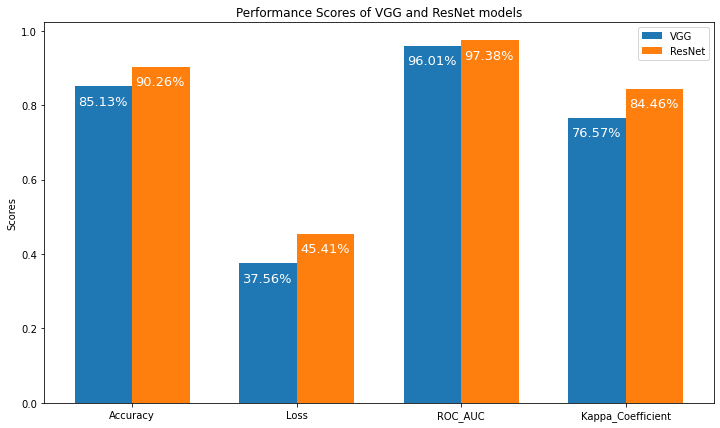

In [17]:
labels= ["Accuracy", "Loss", "ROC_AUC", "Kappa_Coefficient"]
vgg_values = [vgg_performance[m] for m in labels] # getting the value of each metric for vgg
resnet_values = [resnet_performance[m] for m in labels] # getting the value of each metric for resnet

fig, ax = plt.subplots(figsize=(12,7))
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
ax.set_xticks(x)  # setting x-axis ticks
ax.set_xticklabels(labels) # setting the labels on x-axis ticks
rects1 = ax.bar(x - width/2, vgg_values, width, label='VGG')  # plotting vgg performance bars
rects2 = ax.bar(x + width/2, resnet_values, width, label='ResNet') # plotting resnet performance bars
for i in ax.patches:  # adding annotations to the bars
    ax.text(i.get_x()+0.02, i.get_height()-0.05, str(round(100*i.get_height(),2))+'%', color='white', fontsize=13)

ax.set_ylabel('Scores')  # setting y-axis label
ax.set_title('Performance Scores of VGG and ResNet models') # setting the title
ax.legend() # showing the legend of the graph
plt.show()

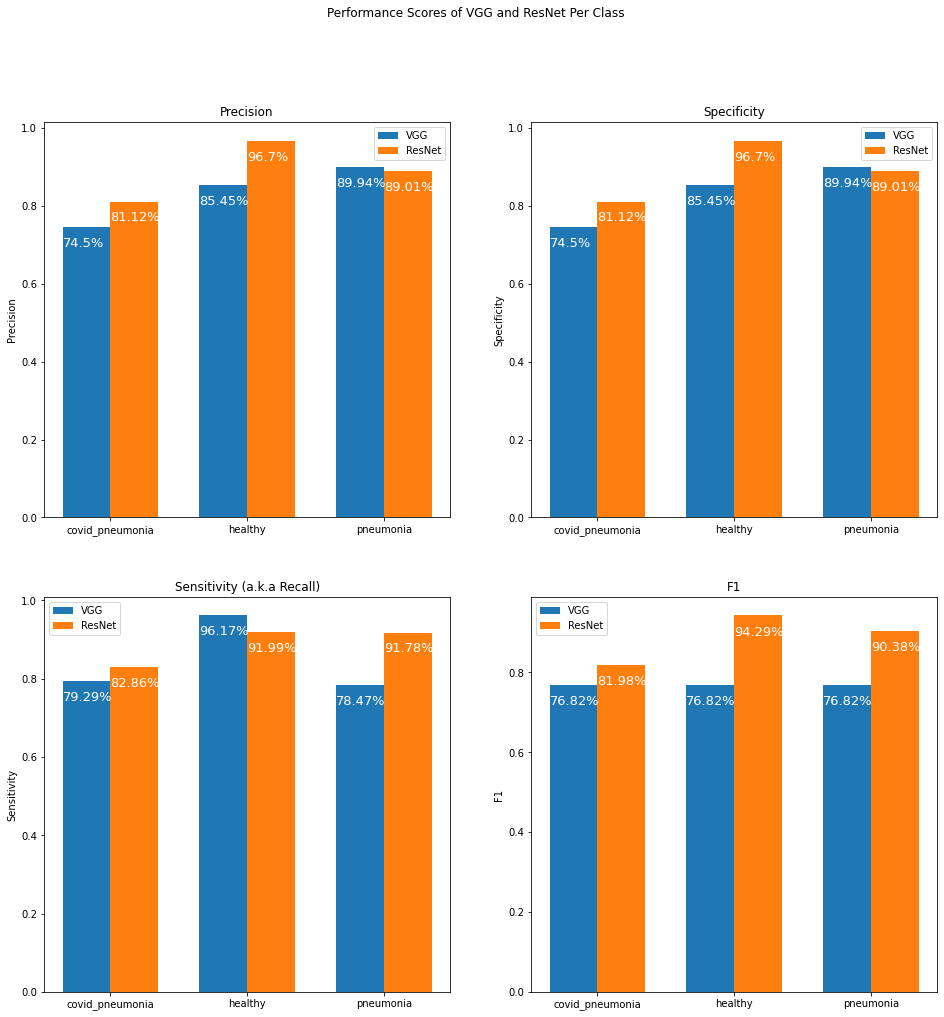

In [18]:
labels= ["covid_pneumonia", "healthy", "pneumonia"]
# precision
vgg_values_p = [vgg_class_level_scores[m][0] for m in labels] # getting the value of precision (at index 0) for vgg
resnet_values_p = [resnet_class_level_scores[m][0] for m in labels]  # getting the value of precision (at index 0) for resnet

# specificity
vgg_values_s = [vgg_class_level_scores[m][1] for m in labels]  # getting the value of specificity (at index 1) for vgg
resnet_values_s = [resnet_class_level_scores[m][1] for m in labels]  # getting the value of specificity (at index 1) for resnet

# sensitivity (a.k.a recall)
vgg_values_r = [vgg_class_level_scores[m][2] for m in labels]  # getting the value of sensitivity (at index 2) for vgg
resnet_values_r = [resnet_class_level_scores[m][2] for m in labels] # getting the value of sensitivity (at index 2) for resnet

# F1
vgg_values_f1 = [vgg_class_level_scores[m][3] for m in labels]  # getting the value of f1 (at index 3) for vgg
resnet_values_f1 = [resnet_class_level_scores[m][3] for m in labels] # # getting the value of f1 (at index 3) for resnet

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16,16))  # setting up graphs grid (2x2)
x = np.arange(len(labels))  # defining the x-axis ticks, which are the label locations
width = 0.35  # the width of the bars

# Precision graphs
ax[0, 0].bar(x - width/2, vgg_values_p, width, label='VGG')
ax[0, 0].bar(x + width/2, resnet_values_p, width, label='ResNet')
ax[0, 0].set_ylabel('Precision')
ax[0, 0].set_title("Precision")

# Specificity graphs
ax[0, 1].bar(x - width/2, vgg_values_p, width, label='VGG')
ax[0, 1].bar(x + width/2, resnet_values_p, width, label='ResNet')
ax[0, 1].set_ylabel('Specificity')
ax[0, 1].set_title("Specificity")

# Recall graphs
ax[1, 0].bar(x - width/2, vgg_values_r, width, label='VGG')
ax[1, 0].bar(x + width/2, resnet_values_r, width, label='ResNet')
ax[1, 0].set_ylabel('Sensitivity')
ax[1, 0].set_title("Sensitivity (a.k.a Recall)")

# F1 graphs
ax[1, 1].bar(x - width/2, vgg_values_f1, width, label='VGG')
ax[1, 1].bar(x + width/2, resnet_values_f1, width, label='ResNet')
ax[1, 1].set_ylabel('F1')
ax[1, 1].set_title('F1')

for i in range(2):
    for j in range(2):  # setting up xticks and xitcks labels for each graph
        ax[i, j].set_xticks(x)
        ax[i, j].set_xticklabels(labels)
        ax[i, j].legend() # showing the legend
        for b in ax[i, j].patches: # adding annotations (metrics values) to the bars
            ax[i, j].text(b.get_x(), b.get_height()-0.05, str(round(100*b.get_height(),2))+'%', color='white', fontsize=13)
fig.suptitle('Performance Scores of VGG and ResNet Per Class') # adding the title
plt.show()

## Macro Average Performance

In [19]:
# calculating the average of each metric for each model over all classes (i.e. macro average)
vgg_precision = np.mean([vgg_class_level_scores[m][0] for m in labels])
vgg_specificity = np.mean([vgg_class_level_scores[m][1] for m in labels])
vgg_sensitivity = np.mean([vgg_class_level_scores[m][2] for m in labels])
vgg_f1 = np.mean([vgg_class_level_scores[m][3] for m in labels])

resnet_precision = np.mean([resnet_class_level_scores[m][0] for m in labels])
resnet_specificity = np.mean([resnet_class_level_scores[m][1] for m in labels])
resnet_sensitivity = np.mean([resnet_class_level_scores[m][2] for m in labels])
resnet_f1 = np.mean([resnet_class_level_scores[m][3] for m in labels])

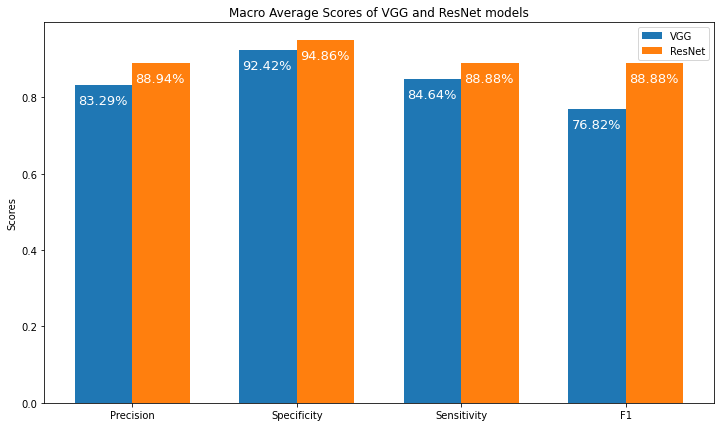

In [20]:
labels = ["Precision", "Specificity", "Sensitivity", "F1"]
vgg_values = [vgg_precision, vgg_specificity, vgg_sensitivity, vgg_f1]
resnet_values = [resnet_precision, resnet_specificity, resnet_sensitivity, resnet_f1]

fig, ax = plt.subplots(figsize=(12, 7))
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
ax.set_xticks(x)
ax.set_xticklabels(labels)
rects1 = ax.bar(x - width/2, vgg_values, width, label='VGG')
rects2 = ax.bar(x + width/2, resnet_values, width, label='ResNet')
for i in ax.patches:
    ax.text(i.get_x()+0.02, i.get_height()-0.05, str(round(100*i.get_height(),2))+'%', color='white', fontsize=13)

ax.set_ylabel('Scores')
ax.set_title('Macro Average Scores of VGG and ResNet models')
ax.legend()
plt.show()

## Confusion Matrix

In [21]:
import seaborn as sns

In [22]:
def plot_confusion_matrix(matrix, classes, model_name):
    plt.subplots(figsize=(16, 9))
     # converting the confusion matrix into a dataframe so that the heatmap reads the class labels automatically
    confusion_df = pd.DataFrame(matrix)
    confusion_df.columns = classes # setting colum names to classes in the confusion matrix dataframe
    confusion_df.index = classes # setting the index to classes in the confusion matrix dataframe
    # creating a heatmap for the confusion matrix
    ax = sns.heatmap(confusion_df, cmap='coolwarm', annot=True, fmt="d", annot_kws={'size':16})
    # putting x-axis labels at top
    ax.xaxis.tick_top()
    ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 14)
    ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 14)
    ax.set_title("Confusion Matrix for "+model_name+'\n', fontsize=22)
    plt.show()

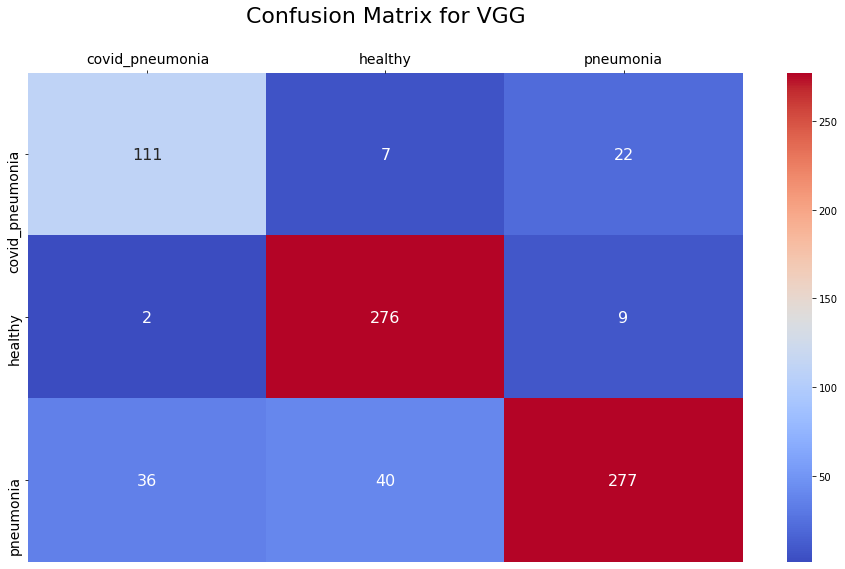

In [23]:
plot_confusion_matrix(np.array(vgg_confusion_matrix), vgg_classes, "VGG")

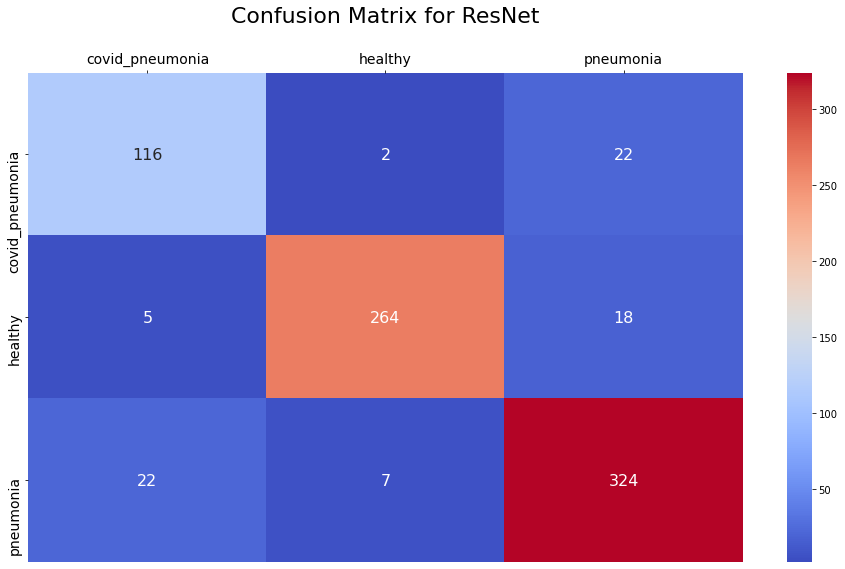

In [24]:
plot_confusion_matrix(np.array(resnet_confusion_matrix), resnet_classes, "ResNet")